In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_path = Path.cwd().joinpath("data", "raw")

In [3]:
concept_detection_base = data_path.joinpath("concept-detection")
concepts_path = concept_detection_base.joinpath("concept-names.csv")
train_labels_path = concept_detection_base.joinpath("training-labels.csv")
validation_labels_path = concept_detection_base.joinpath("validation-labels.csv")
training_images_dir = concept_detection_base.joinpath("training-images")
validation_images_dir = concept_detection_base.joinpath("validation-images")

In [4]:
from src.data.dataloader import  CustomImageDataset
from src.data.vocabulary import Vocabulary

In [5]:

concepts_vocabulary = Vocabulary(concepts_path=concepts_path)

In [6]:
training_data = CustomImageDataset(labels_path=train_labels_path, 
                                   images_dir=training_images_dir, 
                                   vocabulary=concepts_vocabulary)
validation_data = CustomImageDataset(labels_path=validation_labels_path,
                                     images_dir=validation_images_dir,       
                                     vocabulary=concepts_vocabulary)

In [7]:
validation_data.__len__()

7645

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(validation_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64, 8374])


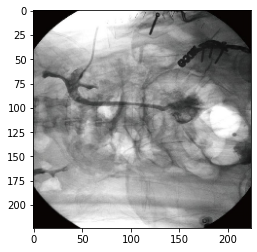

[2300 4329 5444 7290] ***********************
the concepts are: ['C0002978', 'C0009924', 'C0015376', 'C5205401']
Label:  are ['angiogram', 'Contrast Media', 'Extravasation', 'Distal Ureter']


In [15]:

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
label = label.numpy()
plt.imshow(img.T)
plt.show()
concepts = concepts_vocabulary.decode(label)
print(f"the concepts are: {concepts}")
concepts_names = concepts_vocabulary.get_names(concepts)
print(f"Label:  are {concepts_names}")

In [3]:
caption_prediction = data_path.joinpath("caption-prediction")

In [5]:
corpus = pd.read_csv(caption_prediction.joinpath("corpus.csv"), sep="\t")['caption']

In [24]:
from src.data.dataloader import ImageCaptionDataset

In [36]:
training_dataset = ImageCaptionDataset(corpus_path=caption_prediction.joinpath("corpus.csv"), 
                                       dataset_path=caption_prediction.joinpath("training-captions.csv"), 
                                       sequence_length=200)

In [40]:
from torchtext.legacy.data import Field

In [41]:
caption_field = Field(
    sequential=True,
    tokenize='basic_english',
    lower=True,
    include_lengths = True
)
